<a href="https://colab.research.google.com/github/mgw54/Colab_Clones/blob/main/MPACC_noFrac_AKTAdata_Master_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master AKTA Data Analyser 3000

AKTA .csv results figures made very simple and very very pretty

Select your AKTA data type from the drop-down list below and upload file

In [ ]:


data_type = 'AEC' # @param ["AEC", "SEC"]

#@markdown  - provide a jobname e.g. 20231129_mgw54_python_horseplay
jobname = '20250222' #@param {type:"string"}

from google.colab import files
import numpy as np
import pandas as pd
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import os
import time


#@markdown - Upload your .xls AKTA data using the option at the bottom of
#@markdown this cell





In [ ]:
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))



Saving mgw54_20250222_MonoQ_AEC_NA 001.csv to mgw54_20250222_MonoQ_AEC_NA 001.csv


In [ ]:
print(filename)

import io
df = pd.read_csv((filename), encoding = "utf_16_le", sep= '\t', index_col=False)
type(df)
print(df.head)
rows1 = len(df.index)


mgw54_20250222_MonoQ_AEC_NA 001.csv
<bound method NDFrame.head of           Chrom.1 Unnamed: 1   Chrom.1.1 Unnamed: 3   Chrom.1.2 Unnamed: 5  \
0        UV 1_280        NaN        Cond        NaN      Conc B        NaN   
1              ml        mAU          ml      mS/cm          ml          %   
2      -20.262739    0.01396  -20.262739    17.7185  -20.262739          0   
3      -20.246225   2.103521  -20.246225  17.736353   -20.18017          0   
4      -20.229713   2.093622  -20.229713  17.735498  -20.097601          0   
...           ...        ...         ...        ...         ...        ...   
30832  488.832764   0.034521  488.832764  17.536928         NaN        NaN   
30833  488.849274    0.03636  488.849274  17.537548         NaN        NaN   
30834  488.865784   0.036735  488.865784  17.537661         NaN        NaN   
30835  488.882294   0.037237  488.882294  17.537127         NaN        NaN   
30836  488.898804   0.037255  488.898804  17.537678         NaN        NaN  

In [ ]:
#@markdown This next bit requires some work from you
#@markdown - you need to search the data frame above to find the start of the %B column. this can vary depending on what data was included in the data extraction
#@markdown - take note note of the 'Unnamed: x' number and the 10.y numbers and input them below

#@markdown - you will need to review your data, check the name of the columns for each variable to be plotted and alter the code below to reflect it

print("SECTION COMPLETE. Please progress to next section")

SECTION COMPLETE. Please progress to next section


In [ ]:
#@markdown Making little data frames with just the data we need

volsdf = df.tail(-3)["Chrom.1"]

A280df = df.tail(-3)["Unnamed: 1"]

percentbdf = df.tail(-3)["Unnamed: 5"]
percentbdf = percentbdf.fillna(0)

percentbvolsdf = df.tail(-3)["Chrom.1.2"]
percentbvolsdf = percentbvolsdf.fillna(0)


if data_type == 'AEC':
  sumdf1 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df, 'percentbvols' : percentbvolsdf,
                          'percentb': percentbdf,})
  sumdf1 = sumdf1.fillna(0)
elif data_type == 'SEC':
  sumdf1 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df})
  sumdf1 = sumdf1.fillna(0)
else:
  print("ERROR: incorrect data type chosen")

print("SECTION COMPLETE. Please progress to next section")


SECTION COMPLETE. Please progress to next section


In [ ]:
print(sumdf1.astype(float)['vol'])
sumdf1.reset_index()

#test69 = sumdf1['vol'].to_string(index=False)
#print(test69)

print(sumdf1)

3        -20.246225
4        -20.229713
5        -20.213200
6        -20.196688
7        -20.180174
            ...    
30832    488.832764
30833    488.849274
30834    488.865784
30835    488.882294
30836    488.898804
Name: vol, Length: 30834, dtype: float64
              vol      A280 percentbvols percentb
3      -20.246225  2.103521    -20.18017        0
4      -20.229713  2.093622   -20.097601        0
5        -20.2132  0.001728   -20.015032        0
6      -20.196688  0.009311   -19.932463        0
7      -20.180174   0.00521   -19.849895        0
...           ...       ...          ...      ...
30832  488.832764  0.034521            0        0
30833  488.849274   0.03636            0        0
30834  488.865784  0.036735            0        0
30835  488.882294  0.037237            0        0
30836  488.898804  0.037255            0        0

[30834 rows x 4 columns]


user parameters uptaken...
Axes(0.125,0.11;0.775x0.77)
plotting A280 data...
Axes(0.125,0.11;0.775x0.77)
A280 data plotted. Plotting %B...
%B plotted. plotting elution fractions...
No elution fractions displayed
Elution fractions plotted. correcting axes to user values...

printing plot...
Axes(0.125,0.11;0.775x0.77)


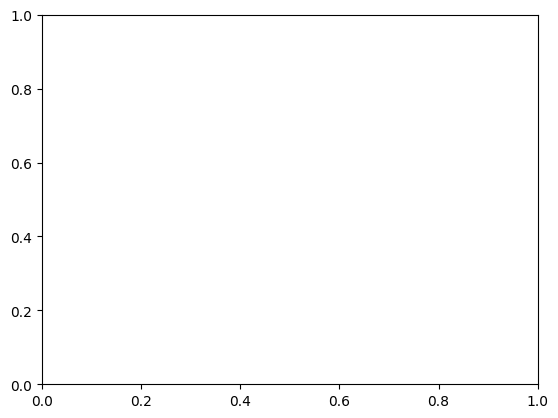

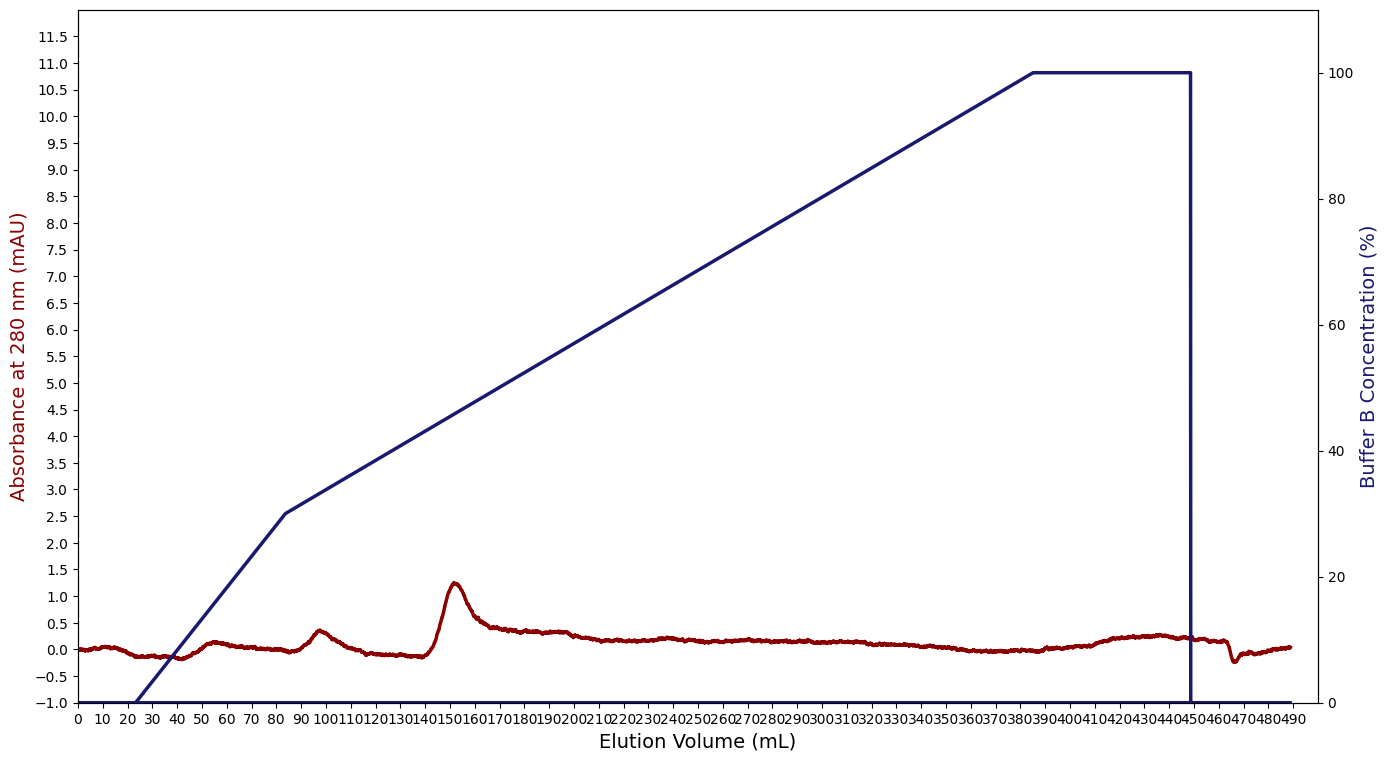

File not saved
Done!


In [ ]:
#@markdown Alter the design of the plot to suit your needs

#@markdown - Do you want elution fractions displayed on your image?
fraction_boolean = False # @param {type:"boolean"}

#@markdown - Set minimum and maximum X and Y values for the graph. This may require some trial and error

min_x_val = 0 # @param {type:"number"}
max_x_val = 500 # @param {type:"number"}
min_y_val = -1 # @param {type:"number"}
max_y_val = 12 # @param {type:"number"}

#@markdown - Select the increments for your axes

inc_x = 10 # @param {type:"number"}
inc_y = 0.5 # @param {type:"number"}

#@markdown - do you wish to save your file?

save_file = False # @param {type:"boolean"}

#@markdown - saved files will be automatically downloaded to your downloads folder

print("user parameters uptaken...")
print(plt.gca())

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(16,9))
print("plotting A280 data...")

# set x-axis label
ax.set_xlabel("Elution Volume (mL)", fontsize = 14, fontname = 'DejaVu Sans')
# set y-axis label
ax.set_ylabel("Absorbance at 280 nm (mAU)",
              color="darkred",
              fontsize=14, fontname = 'DejaVu Sans')


ax.set_xlim([min_x_val, max_x_val])
ax.set_ylim([min_y_val, max_y_val])

plt.yticks(np.arange(min_y_val, max_y_val, inc_y))

print(plt.gca())

# make a plot
ax.plot(sumdf1.astype(float)['vol'],
        sumdf1.astype(float)['A280'],
        color="darkred", linewidth = 2.5)


print("A280 data plotted. Plotting %B...")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()




# make a plot with different y-axis using second axis object
if data_type == 'AEC':
  plt.axis([min_x_val, max_x_val, 0, 110])
  plt.xticks(np.arange(min_x_val, max_x_val, inc_x))
  ax2.plot(sumdf1.astype(float)['percentbvols'], sumdf1.astype(float)['percentb'],color="midnightblue", linewidth = 2.5)
  ax2.set_ylabel("Buffer B Concentration (%)",color="midnightblue",fontsize=14, fontname = 'DejaVu Sans')


else: print("No %B values shown, data_type == SEC")

print("%B plotted. plotting elution fractions...")


# twin object for two different y-axis on the sample plot
if fraction_boolean == True:
  ax3=ax.twiny()
  ax3.set_xlim(ax2.get_xlim())
  new_tick_locations = np.array(fractionvolsdf)
  ax3.set_xticks(new_tick_locations)
  ax3.set_xticklabels(fractiondf, fontsize=10)
  ax3.set_xlabel(r"Elution Fractions", fontsize=14, fontname = 'DejaVu Sans')
else:
  print("No elution fractions displayed")

print("Elution fractions plotted. correcting axes to user values...")

if fraction_boolean == True:
  plt.axis([min_x_val, max_x_val, min_y_val, max_y_val])
else:
  print("")




print("printing plot...")

print(plt.gca())
plt.show()

# save the plot as a file


if save_file == True:
  fig.savefig(f'{jobname}.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{jobname}.jpg')
  print("downloading plot...")
else:
  print("File not saved")


print("Done!")

In [ ]:
#@markdown   #**This section will make the joy division plot for multiple data sets**

#@markdown  - provide a name for 1st time point e.g. 60min
jobname1 = '60min' #@param {type:"string"}
uploaded1 = files.upload()
filename1 = next(iter(uploaded1))
df_JD_1 = pd.read_csv((filename1), encoding = "utf_16_le", sep= '\t', index_col=False)
rows1 = len(df_JD_1.index)
volsdf_JD_1 = df_JD_1.tail(-3)["Chrom.1"]
A280df_JD_1 = df_JD_1.tail(-3)["Unnamed: 1"]
sumdf_JD_1 = pd.DataFrame(data={'vol': volsdf_JD_1,
                          'A280': A280df_JD_1})
sumdf_JD_1 = sumdf_JD_1.fillna(0)



#@markdown  - provide a name for 2nd time point e.g. 60min
jobname2 = '50min' #@param {type:"string"}
uploaded2 = files.upload()
filename2 = next(iter(uploaded2))
df_JD_2 = pd.read_csv((filename2), encoding = "utf_16_le", sep= '\t', index_col=False)
rows2 = len(df_JD_2.index)
volsdf_JD_2 = df_JD_2.tail(-3)["Chrom.1"]
A280df_JD_2 = df_JD_2.tail(-3)["Unnamed: 1"]
sumdf_JD_2 = pd.DataFrame(data={'vol': volsdf_JD_2,
                          'A280': A280df_JD_2})
sumdf_JD_2 = sumdf_JD_2.fillna(0)
sumdf_JD_2['mins'] = 10

#@markdown  - provide a name for 3rd time point e.g. 60min
jobname3 = '40min' #@param {type:"string"}
uploaded3 = files.upload()
filename3 = next(iter(uploaded3))
df_JD_3 = pd.read_csv((filename3), encoding = "utf_16_le", sep= '\t', index_col=False)
rows3 = len(df_JD_3.index)
volsdf_JD_3 = df_JD_3.tail(-3)["Chrom.1"]
A280df_JD_3 = df_JD_3.tail(-3)["Unnamed: 1"]
sumdf_JD_3 = pd.DataFrame(data={'vol': volsdf_JD_3,
                          'A280': A280df_JD_3})
sumdf_JD_3 = sumdf_JD_3.fillna(0)

#@markdown  - provide a name for 4th time point e.g. 60min
jobname4 = '30min' #@param {type:"string"}
uploaded4 = files.upload()
filename4 = next(iter(uploaded4))
df_JD_4 = pd.read_csv((filename4), encoding = "utf_16_le", sep= '\t', index_col=False)
rows3 = len(df_JD_4.index)
volsdf_JD_4 = df_JD_4.tail(-3)["Chrom.1"]
A280df_JD_4 = df_JD_4.tail(-3)["Unnamed: 1"]
sumdf_JD_4 = pd.DataFrame(data={'vol': volsdf_JD_4,
                          'A280': A280df_JD_4})
sumdf_JD_4 = sumdf_JD_4.fillna(0)

#@markdown  - provide a name for 5th time point e.g. 60min
jobname5 = '25min' #@param {type:"string"}
uploaded5 = files.upload()
filename5 = next(iter(uploaded5))
df_JD_5 = pd.read_csv((filename5), encoding = "utf_16_le", sep= '\t', index_col=False)
rows5 = len(df_JD_5.index)
volsdf_JD_5 = df_JD_5.tail(-3)["Chrom.1"]
A280df_JD_5 = df_JD_5.tail(-3)["Unnamed: 1"]
sumdf_JD_5 = pd.DataFrame(data={'vol': volsdf_JD_5,
                          'A280': A280df_JD_5})
sumdf_JD_5 = sumdf_JD_5.fillna(0)

#@markdown  - provide a name for 6th time point e.g. 60min
jobname6 = '20min' #@param {type:"string"}
uploaded6 = files.upload()
filename6 = next(iter(uploaded6))
df_JD_6 = pd.read_csv((filename6), encoding = "utf_16_le", sep= '\t', index_col=False)
rows6 = len(df_JD_6.index)
volsdf_JD_6 = df_JD_6.tail(-3)["Chrom.1"]
A280df_JD_6 = df_JD_6.tail(-3)["Unnamed: 1"]
sumdf_JD_6 = pd.DataFrame(data={'vol': volsdf_JD_6,
                          'A280': A280df_JD_6})
sumdf_JD_6 = sumdf_JD_6.fillna(0)

#@markdown  - provide a name for 7th time point e.g. 60min
jobname7 = '15min' #@param {type:"string"}
uploaded7 = files.upload()
filename7 = next(iter(uploaded7))
df_JD_7 = pd.read_csv((filename7), encoding = "utf_16_le", sep= '\t', index_col=False)
rows7 = len(df_JD_7.index)
volsdf_JD_7 = df_JD_7.tail(-3)["Chrom.1"]
A280df_JD_7 = df_JD_7.tail(-3)["Unnamed: 1"]
sumdf_JD_7 = pd.DataFrame(data={'vol': volsdf_JD_7,
                          'A280': A280df_JD_7})
sumdf_JD_7 = sumdf_JD_7.fillna(0)

#@markdown  - provide a name for 8th time point e.g. 60min
jobname8 = '10min' #@param {type:"string"}
uploaded8 = files.upload()
filename8 = next(iter(uploaded8))
df_JD_8 = pd.read_csv((filename8), encoding = "utf_16_le", sep= '\t', index_col=False)
rows8 = len(df_JD_8.index)
volsdf_JD_8 = df_JD_8.tail(-3)["Chrom.1"]
A280df_JD_8 = df_JD_8.tail(-3)["Unnamed: 1"]
sumdf_JD_8 = pd.DataFrame(data={'vol': volsdf_JD_8,
                          'A280': A280df_JD_8})
sumdf_JD_8 = sumdf_JD_8.fillna(0)

#@markdown  - provide a name for 9th time point e.g. 60min
jobname9 = '5min' #@param {type:"string"}
uploaded9 = files.upload()
filename9 = next(iter(uploaded9))
df_JD_9 = pd.read_csv((filename9), encoding = "utf_16_le", sep= '\t', index_col=False)
rows9 = len(df_JD_9.index)
volsdf_JD_9 = df_JD_9.tail(-3)["Chrom.1"]
A280df_JD_9 = df_JD_9.tail(-3)["Unnamed: 1"]
sumdf_JD_9 = pd.DataFrame(data={'vol': volsdf_JD_9,
                          'A280': A280df_JD_9})
sumdf_JD_9 = sumdf_JD_9.fillna(0)



Saving 20240628_4_22_60min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_60min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_50min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_50min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_40min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_40min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_30min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_30min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_25min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_25min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_20min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_20min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_15min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_15min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_10min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_10min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


Saving 20240628_4_22_5min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv to 20240628_4_22_5min_mgw54_20240617_MonoQ_AEC_b562_Ru 001 001.csv


In [ ]:
sumdf_JD_1['mins'] = 60
sumdf_JD_2['mins'] = 50
sumdf_JD_3['mins'] = 40
sumdf_JD_4['mins'] = 30
sumdf_JD_5['mins'] = 25
sumdf_JD_6['mins'] = 20
sumdf_JD_7['mins'] = 15
sumdf_JD_8['mins'] = 10
sumdf_JD_9['mins'] = 5


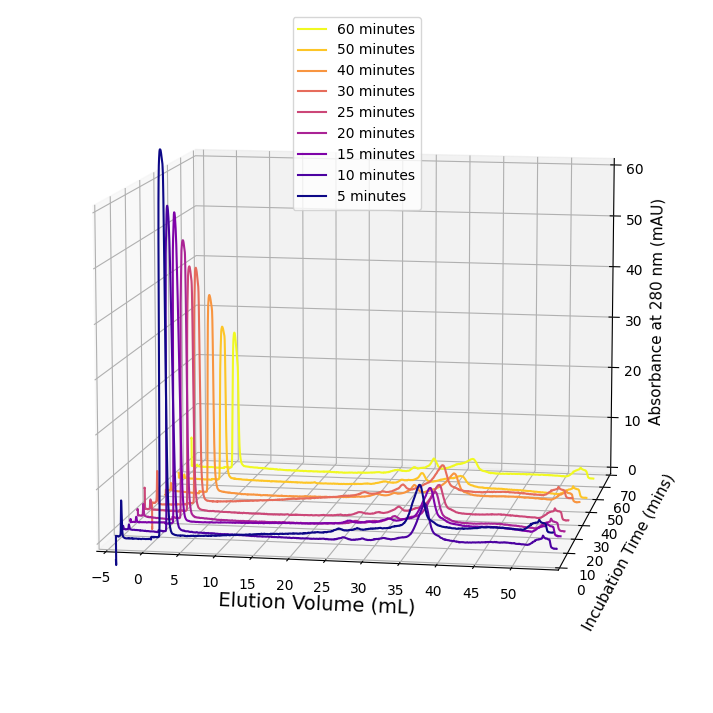

File not saved


In [ ]:
from mpl_toolkits import mplot3d
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis

fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')
#@markdown #Making the Joy Division graph

#@markdown - Set minimum and maximum X and Y values for the graph. This may require some trial and error

Image_Name = "JoyDivision 4_22" #@param {type:"string"}

min_x_val = -5 # @param {type:"number"}
max_x_val = 55 # @param {type:"number"}
min_y_val = 0 # @param {type:"number"}
max_y_val = 60 # @param {type:"number"}
min_z_val = 0 # @param {type:"number"}
max_z_val = 70 # @param {type:"number"}


#@markdown - Select the increments for your axes

inc_x = 5 # @param {type:"number"}
inc_y = 5 # @param {type:"number"}
inc_z = 5 # @param {type:"number"}

#@markdown - do you wish to save your file?

save_file = False # @param {type:"boolean"}

#@markdown - saved files will be automatically downloaded to your downloads folder
ax.set_xlim3d([min_x_val, max_x_val])
ax.set_ylim3d([min_z_val, max_z_val])
ax.set_zlim3d([min_y_val, max_y_val])

# set x-axis label
ax.set_xlabel("Elution Volume (mL)", fontsize = 14, fontname = 'DejaVu Sans')
# set y-axis label
ax.set_zlabel("Absorbance at 280 nm (mAU)",
              color="black",
              fontsize=11, fontname = 'DejaVu Sans')

ax.set_ylabel('Incubation Time (mins)', color="black", fontsize=11, fontname='DejaVu Sans')

plt.xticks(np.arange(min_x_val, max_x_val, inc_x))

ax.plot3D(sumdf_JD_1.astype(float)['vol'], sumdf_JD_1.astype(float)['mins'], sumdf_JD_1.astype(float)['A280'], color = '#f0f921', label = "60 minutes")
ax.plot3D(sumdf_JD_2.astype(float)['vol'], sumdf_JD_2.astype(float)['mins'], sumdf_JD_2.astype(float)['A280'], color = '#fdc527', label = "50 minutes")
ax.plot3D(sumdf_JD_3.astype(float)['vol'], sumdf_JD_3.astype(float)['mins'], sumdf_JD_3.astype(float)['A280'], color = '#f89540', label = "40 minutes")
ax.plot3D(sumdf_JD_4.astype(float)['vol'], sumdf_JD_4.astype(float)['mins'], sumdf_JD_4.astype(float)['A280'], color = '#e66c5c', label = "30 minutes")
ax.plot3D(sumdf_JD_5.astype(float)['vol'], sumdf_JD_5.astype(float)['mins'], sumdf_JD_5.astype(float)['A280'], color = '#cc4778', label = "25 minutes")
ax.plot3D(sumdf_JD_6.astype(float)['vol'], sumdf_JD_6.astype(float)['mins'], sumdf_JD_6.astype(float)['A280'], color = '#aa2395', label = "20 minutes")
ax.plot3D(sumdf_JD_7.astype(float)['vol'], sumdf_JD_7.astype(float)['mins'], sumdf_JD_7.astype(float)['A280'], color = '#7e03a8', label = "15 minutes")
ax.plot3D(sumdf_JD_8.astype(float)['vol'], sumdf_JD_8.astype(float)['mins'], sumdf_JD_8.astype(float)['A280'], color = '#4c02a1', label = "10 minutes")
ax.plot3D(sumdf_JD_9.astype(float)['vol'], sumdf_JD_9.astype(float)['mins'], sumdf_JD_9.astype(float)['A280'], color = '#0d0887', label = "5 minutes")



ax.view_init(10, -80)
plt.legend(loc = 'upper center')
plt.show()

if save_file == True:
  fig.savefig(f'{Image_Name}.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{Image_Name}.jpg')
  print("downloading plot...")
else:
  print("File not saved")


user parameters uptaken...
plotting A280 data...


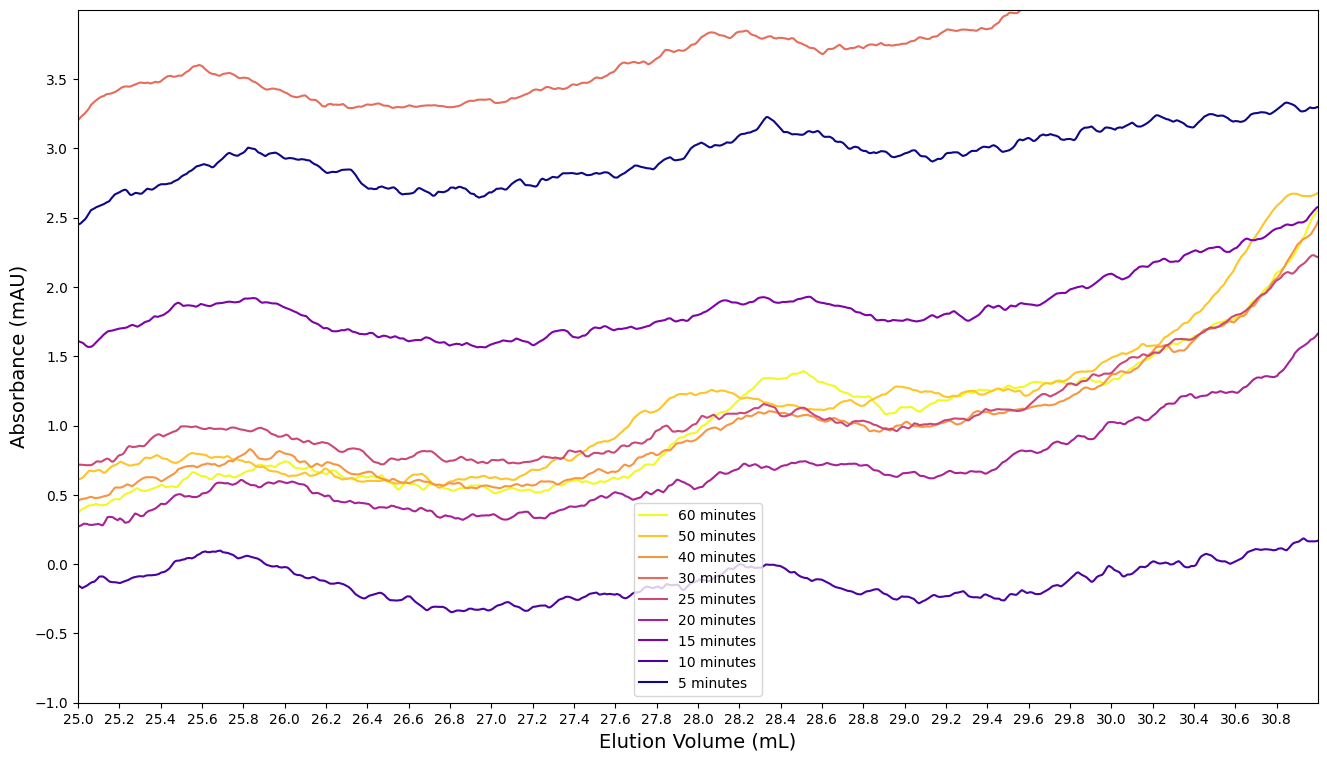

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading plot...


In [ ]:
#@markdown #make a simple 2D graph to identify precise elution volumes of peaks across all 9 incubation times
#@markdown - Set minimum and maximum X and Y values for the graph. This may require some trial and error
min_x_val = 25 # @param {type:"number"}
max_x_val = 31 # @param {type:"number"}
min_y_val = -1 # @param {type:"number"}
max_y_val = 4 # @param {type:"number"}
#@markdown - Select the increments for your axes
inc_x = 0.2 # @param {type:"number"}
inc_y = 0.5 # @param {type:"number"}
#@markdown - do you wish to save your file?
Image_Name = "4_22_all_incubations_2D_peak3" #@param {type:"string"}
save_file = True # @param {type:"boolean"}
#@markdown - saved files will be automatically downloaded to your downloads folder
print("user parameters uptaken...")
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(16,9))
print("plotting A280 data...")
# set x-axis label
ax.set_xlabel("Elution Volume (mL)", fontsize = 14, fontname = 'DejaVu Sans')
# set y-axis label
ax.set_ylabel("Absorbance (mAU)",
              color="black",
              fontsize=14, fontname = 'DejaVu Sans')
ax.set_xlim([min_x_val, max_x_val])
ax.set_ylim([min_y_val, max_y_val])
plt.yticks(np.arange(min_y_val, max_y_val, inc_y))
plt.xticks(np.arange(min_x_val, max_x_val, inc_x))
# make a plot
ax.plot(sumdf_JD_1.astype(float)['vol'],
        sumdf_JD_1.astype(float)['A280'],
        color = '#f0f921', label = "60 minutes")
ax.plot(sumdf_JD_2.astype(float)['vol'],
        sumdf_JD_2.astype(float)['A280'],
        color = '#fdc527', label = "50 minutes")
ax.plot(sumdf_JD_3.astype(float)['vol'],
        sumdf_JD_3.astype(float)['A280'],
        color = '#f89540', label = "40 minutes")
ax.plot(sumdf_JD_4.astype(float)['vol'],
        sumdf_JD_4.astype(float)['A280'],
        color = '#e66c5c', label = "30 minutes")
ax.plot(sumdf_JD_5.astype(float)['vol'],
        sumdf_JD_5.astype(float)['A280'],
        color = '#cc4778', label = "25 minutes")
ax.plot(sumdf_JD_6.astype(float)['vol'],
        sumdf_JD_6.astype(float)['A280'],
        color = '#aa2395', label = "20 minutes")
ax.plot(sumdf_JD_7.astype(float)['vol'],
        sumdf_JD_7.astype(float)['A280'],
        color = '#7e03a8', label = "15 minutes")
ax.plot(sumdf_JD_8.astype(float)['vol'],
        sumdf_JD_8.astype(float)['A280'],
        color = '#4c02a1', label = "10 minutes")
ax.plot(sumdf_JD_9.astype(float)['vol'],
        sumdf_JD_9.astype(float)['A280'],
        color = '#0d0887', label = "5 minutes")
plt.legend()
plt.show()

if save_file == True:
  fig.savefig(f'{Image_Name}.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{Image_Name}.jpg')
  print("downloading plot...")
else:
  print("File not saved")


In [ ]:
#@markdown #Use this cell to gather the absorbance at specified elution volumes for all incubation times

#@markdown please insert expected peak volume below
peak_volume = 31.2 # @param {type:"number"}

#@markdown data will be printed at the bottom of this cell
abs_JD_list = []
time_JD_list = [60, 50, 40, 30, 25, 20, 15, 10, 5]
volA280 = sumdf_JD_1.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_1.astype(float)['A280'][closest_indexa280]
print(f"At 60 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_2.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_2.astype(float)['A280'][closest_indexa280]
print(f"At 50 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_3.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_3.astype(float)['A280'][closest_indexa280]
print(f"At 40 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_4.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_4.astype(float)['A280'][closest_indexa280]
print(f"At 30 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_5.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_5.astype(float)['A280'][closest_indexa280]
print(f"At 25 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_6.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_6.astype(float)['A280'][closest_indexa280]
print(f"At 20 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_7.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_7.astype(float)['A280'][closest_indexa280]
print(f"At 15 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_8.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_8.astype(float)['A280'][closest_indexa280]
print(f"At 10 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)
volA280 = sumdf_JD_9.astype(float)['vol'].dropna()
differencesa280 = np.abs(volA280 - peak_volume)
closest_indexa280 = differencesa280.argmin()
closest_valuea280 = volA280[closest_indexa280]
peak_A280 = sumdf_JD_9.astype(float)['A280'][closest_indexa280]
print(f"At 5 mins: A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
abs_JD_list.append(peak_A280)

print(f"Time values: {time_JD_list}")
print(f"Absorbance values: {abs_JD_list}")

#make sure you chaneg the value of the peak below

peak2_abs_vals = abs_JD_list

At 60 mins: A280 absorbance at 31.190952 mL = 3.009771 mAU
At 50 mins: A280 absorbance at 31.19067 mL = 2.452253 mAU
At 40 mins: A280 absorbance at 31.191217 mL = 2.778666 mAU
At 30 mins: A280 absorbance at 31.190605 mL = 5.159727 mAU
At 25 mins: A280 absorbance at 31.190222 mL = 2.323198 mAU
At 20 mins: A280 absorbance at 31.191538 mL = 1.718465 mAU
At 15 mins: A280 absorbance at 31.191647 mL = 2.591184 mAU
At 10 mins: A280 absorbance at 31.190113 mL = 0.260468 mAU
At 5 mins: A280 absorbance at 31.188824 mL = 3.279582 mAU
Time values: [60, 50, 40, 30, 25, 20, 15, 10, 5]
Absorbance values: [3.009771, 2.452253, 2.778666, 5.159727, 2.323198, 1.718465, 2.591184, 0.260468, 3.279582]


[3.331511, 2.325518, 5.184634, 9.038132, 6.670394, 6.456349, 8.485229, 6.837897, 11.522449]
[3.009771, 2.452253, 2.778666, 5.159727, 2.323198, 1.718465, 2.591184, 0.260468, 3.279582]
[1.306172, 1.191117, 1.094288, 3.801602, 1.125207, 0.710396, 1.918073, -0.025689, 3.144705]
   time      peak1     peak2     peak3       apo      holo
0    60   3.331511  3.009771  1.306172  0.435637  0.564363
1    50   2.325518  2.452253  1.191117  0.389607  0.610393
2    40   5.184634  2.778666  1.094288  0.572408  0.427592
3    30   9.038132  5.159727  3.801602  0.502133  0.497867
4    25   6.670394  2.323198  1.125207  0.659208  0.340792
5    20   6.456349  1.718465  0.710396  0.726640  0.273360
6    15   8.485229  2.591184  1.918073  0.652987  0.347013
7    10   6.837897  0.260468 -0.025689  0.966805  0.033195
8     5  11.522449  3.279582  3.144705  0.642036  0.357964


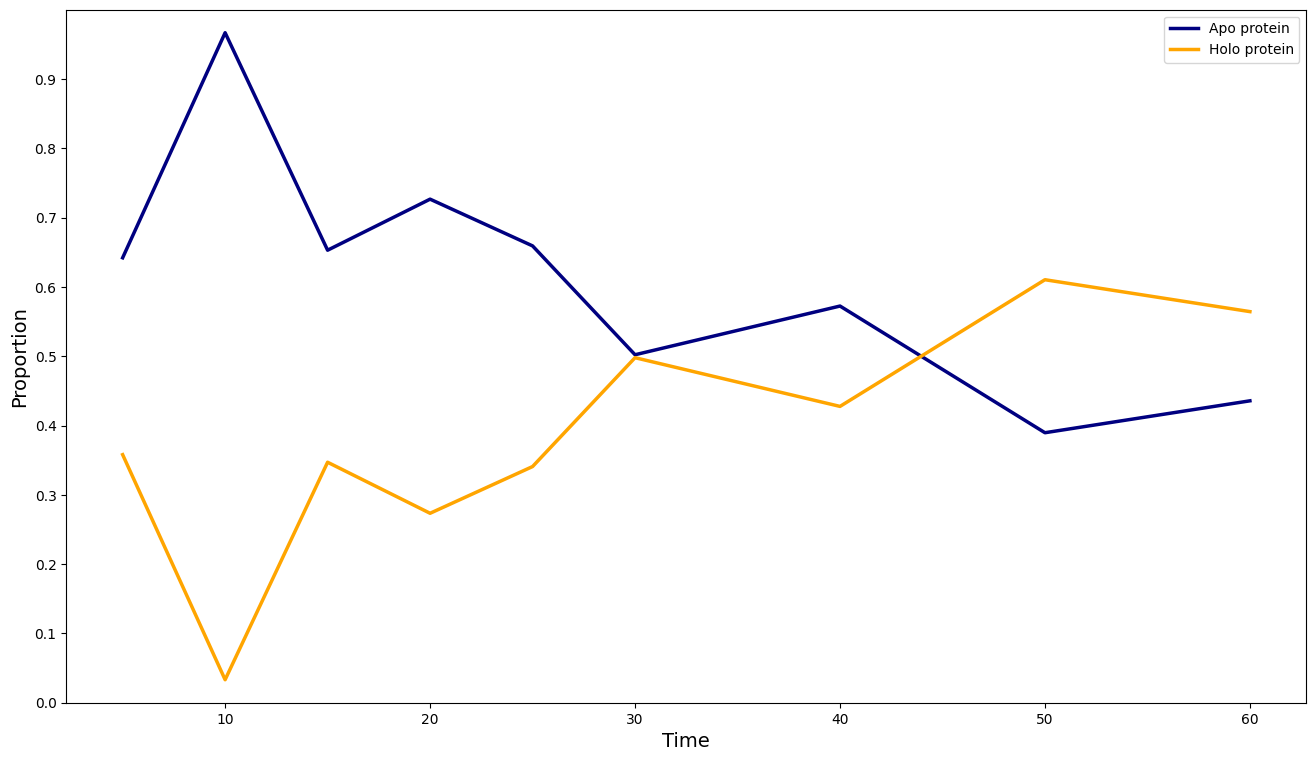

File not saved


In [ ]:
print(peak1_abs_vals)
print(peak2_abs_vals)
print(peak3_abs_vals)

manypeaksdf = pd.DataFrame()
manypeaksdf['time']= np.array(time_JD_list)
manypeaksdf['peak1']= np.array(peak1_abs_vals)
manypeaksdf['peak2']= np.array(peak2_abs_vals)
manypeaksdf['peak3']= np.array(peak3_abs_vals)
manypeaksdf['apo']= manypeaksdf['peak1'].astype(float) / (manypeaksdf['peak1'].astype(float) + manypeaksdf['peak2'].astype(float) + manypeaksdf['peak3'].astype(float))
manypeaksdf['holo']= ( manypeaksdf['peak2'].astype(float) + manypeaksdf['peak3'].astype(float)) / (manypeaksdf['peak1'].astype(float) + manypeaksdf['peak2'].astype(float) + manypeaksdf['peak3'].astype(float))

print(manypeaksdf)
#@markdown - do you wish to save your file?
Image_Name = "WT_apo_versus_holo" #@param {type:"string"}
save_file = False # @param {type:"boolean"}
fig, ax = plt.subplots(figsize=(16,9))
plt.yticks(np.arange(0, 1, 0.1))
ax.set_ylim([0, 1])

ax.set_xlabel("Time", fontsize = 14, fontname = 'DejaVu Sans')
ax.set_ylabel("Proportion",
              color="black",
              fontsize=14, fontname = 'DejaVu Sans')
ax.plot(manypeaksdf.astype(float)['time'],
        manypeaksdf.astype(float)['apo'],
        color = 'navy', label = "Apo protein", linewidth = 2.5)
ax.plot(manypeaksdf.astype(float)['time'],
        manypeaksdf.astype(float)['holo'],
        color = 'orange', label = "Holo protein", linewidth = 2.5)

plt.legend()
plt.show()

if save_file == True:
  fig.savefig(f'{Image_Name}.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{Image_Name}.jpg')
  print("downloading plot...")
else:
  print("File not saved")


File not saved


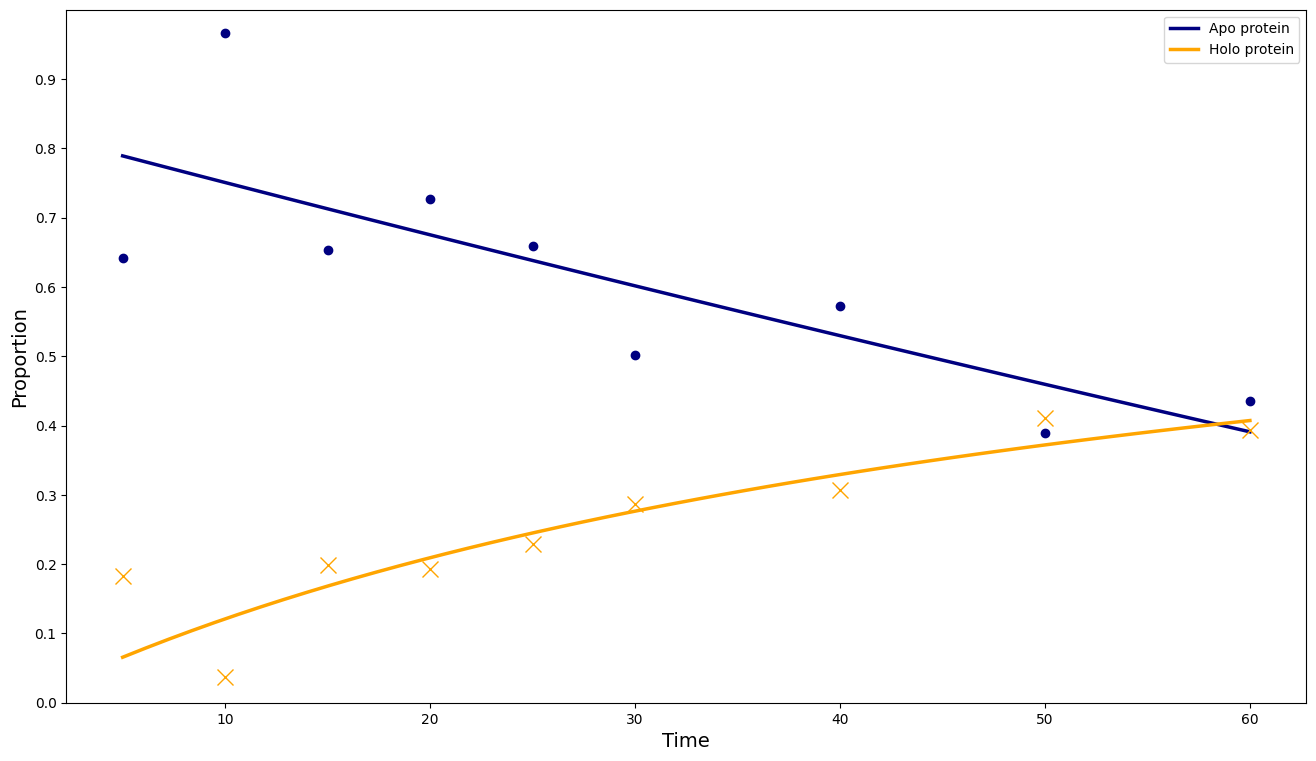

In [ ]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots(figsize=(16,9))
plt.yticks(np.arange(0, 1, 0.1))
ax.set_ylim([0, 1])
ax.set_xlabel("Time", fontsize = 14, fontname = 'DejaVu Sans')
ax.set_ylabel("Proportion",
              color="black",
              fontsize=14, fontname = 'DejaVu Sans')
def func(x, a, b, c):
    return a/(x+b) + c

x = manypeaksdf['time']
y = manypeaksdf['apo']
popt, _ = curve_fit(func, x, y, maxfev=5000)

xfine = np.linspace(x.min(), x.max(), 50)
yfit = func(xfine, *popt)

ax.plot(x, y, ".",
        color = 'navy',  linewidth = 2.5, markersize = 12.0)
ax.plot(xfine, yfit,
        color = 'navy', label = "Apo protein", linewidth = 2.5)

def func(x, a, b, c):
    return (a*b*x)/(c+x)

x = manypeaksdf['time']
y = manypeaksdf['single']
popt, _ = curve_fit(func, x, y, maxfev=5000)

xfine = np.linspace(x.min(), x.max(), 50)
yfit = func(xfine, *popt)

ax.plot(x, y, "x",
        color = 'orange',  linewidth = 2.5, markersize = 12.0)
ax.plot(xfine, yfit,
        color = 'orange', label = "Holo protein", linewidth = 2.5)

plt.legend()

fig.show()

#@markdown - do you wish to save your file?
Image_Name = "WT_apo_versus_holo_nonlinearfits" #@param {type:"string"}
save_file = False # @param {type:"boolean"}

if save_file == True:
  fig.savefig(f'{Image_Name}.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{Image_Name}.jpg')
  print("downloading plot...")
else:
  print("File not saved")

[3.331511, 2.325518, 5.184634, 9.038132, 6.670394, 6.456349, 8.485229, 6.837897, 11.522449]
[3.009771, 2.452253, 2.778666, 5.159727, 2.323198, 1.718465, 2.591184, 0.260468, 3.279582]
[1.306172, 1.191117, 1.094288, 3.801602, 1.125207, 0.710396, 1.918073, -0.025689, 3.144705]
   time      peak1     peak2     peak3       apo    single    double
0    60   3.331511  3.009771  1.306172  0.435637  0.393565  0.170798
1    50   2.325518  2.452253  1.191117  0.389607  0.410839  0.199554
2    40   5.184634  2.778666  1.094288  0.572408  0.306778  0.120815
3    30   9.038132  5.159727  3.801602  0.502133  0.286660  0.211206
4    25   6.670394  2.323198  1.125207  0.659208  0.229592  0.111200
5    20   6.456349  1.718465  0.710396  0.726640  0.193407  0.079953
6    15   8.485229  2.591184  1.918073  0.652987  0.199406  0.147607
7    10   6.837897  0.260468 -0.025689  0.966805  0.036827 -0.003632
8     5  11.522449  3.279582  3.144705  0.642036  0.182740  0.175224


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading plot...


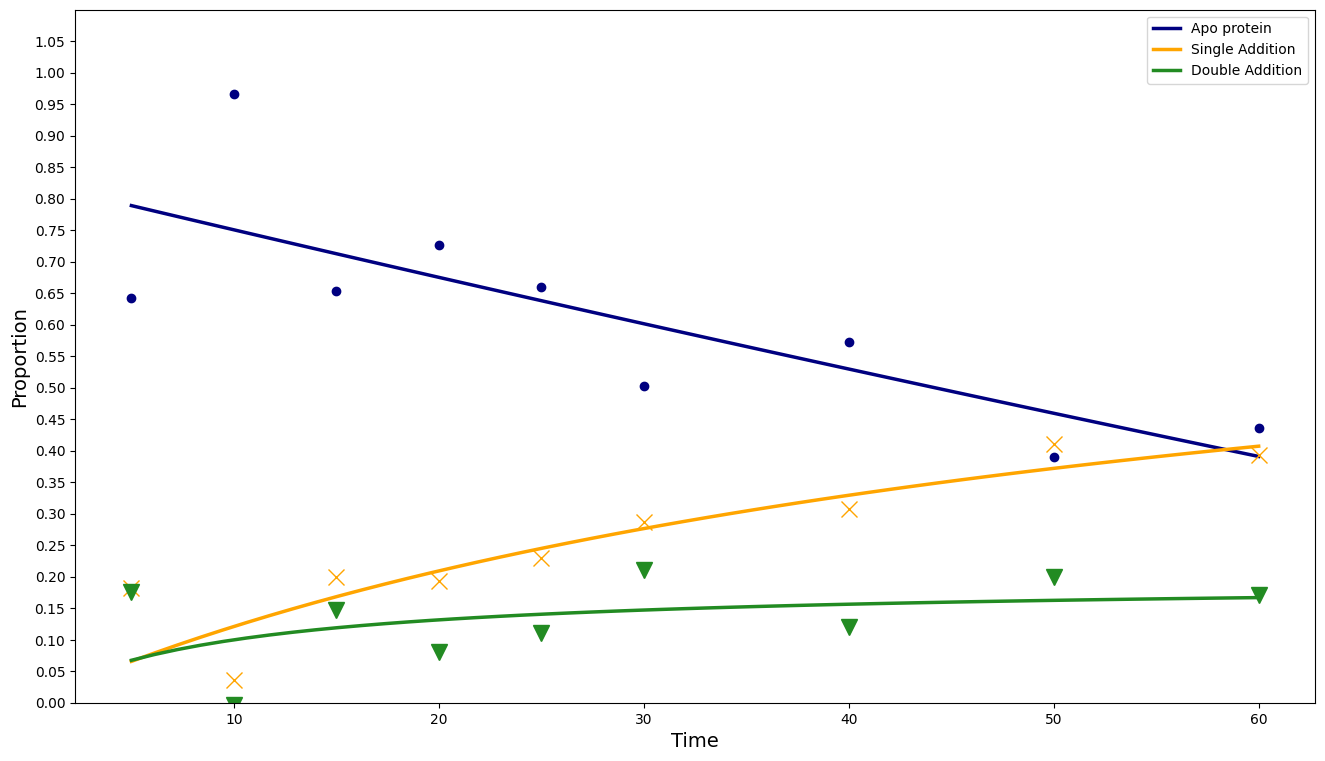

In [ ]:
#This plot is for the 4.22 mutant which seems to have a small amount of double addition

print(peak1_abs_vals)
print(peak2_abs_vals)
print(peak3_abs_vals)

manypeaksdf = pd.DataFrame()
manypeaksdf['time']= np.array(time_JD_list)
manypeaksdf['peak1']= np.array(peak1_abs_vals)
manypeaksdf['peak2']= np.array(peak2_abs_vals)
manypeaksdf['peak3']= np.array(peak3_abs_vals)
manypeaksdf['apo']= manypeaksdf['peak1'].astype(float) / (manypeaksdf['peak1'].astype(float) + manypeaksdf['peak2'].astype(float) + manypeaksdf['peak3'].astype(float))
manypeaksdf['single']=  manypeaksdf['peak2'].astype(float)/ (manypeaksdf['peak1'].astype(float) + manypeaksdf['peak2'].astype(float) + manypeaksdf['peak3'].astype(float))
manypeaksdf['double']= manypeaksdf['peak3'].astype(float)/ (manypeaksdf['peak1'].astype(float) + manypeaksdf['peak2'].astype(float) + manypeaksdf['peak3'].astype(float))
print(manypeaksdf)
from scipy.optimize import curve_fit

fig, ax = plt.subplots(figsize=(16,9))
plt.yticks(np.arange(0, 1.1, 0.05))
ax.set_ylim([0, 1.1])
ax.set_xlabel("Time", fontsize = 14, fontname = 'DejaVu Sans')
ax.set_ylabel("Proportion",
              color="black",
              fontsize=14, fontname = 'DejaVu Sans')
def func(x, a, b, c):
    return a/(x+b) + c

x = manypeaksdf['time']
y = manypeaksdf['apo']
popt, _ = curve_fit(func, x, y, maxfev=5000)

xfine = np.linspace(x.min(), x.max(), 50)
yfit = func(xfine, *popt)

ax.plot(x, y, ".",
        color = 'navy',  linewidth = 2.5, markersize = 12.0)
ax.plot(xfine, yfit,
        color = 'navy', label = "Apo protein", linewidth = 2.5)

def func(x, a, b, c):
    return (a*b*x)/(c+x)

x = manypeaksdf['time']
y = manypeaksdf['single']
popt, _ = curve_fit(func, x, y, maxfev=5000)

xfine = np.linspace(x.min(), x.max(), 50)
yfit = func(xfine, *popt)

ax.plot(x, y, "x",
        color = 'orange',  linewidth = 2.5, markersize = 12.0)
ax.plot(xfine, yfit,
        color = 'orange', label = "Single Addition", linewidth = 2.5)

def func(x, a, b, c):
    return (a*b*x)/(c+x)

x = manypeaksdf['time']
y = manypeaksdf['double']
popt, _ = curve_fit(func, x, y, maxfev=5000)

xfine = np.linspace(x.min(), x.max(), 50)
yfit = func(xfine, *popt)

ax.plot(x, y, "v",
        color = 'forestgreen',  linewidth = 2.5, markersize = 12.0)
ax.plot(xfine, yfit,
        color = 'forestgreen', label = "Double Addition", linewidth = 2.5)

plt.legend()

fig.show()

#@markdown - do you wish to save your file?
Image_Name = "4_22_apo_versus_holo_nonlinearfits" #@param {type:"string"}
save_file = True # @param {type:"boolean"}

if save_file == True:
  fig.savefig(f'{Image_Name}.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{Image_Name}.jpg')
  print("downloading plot...")
else:
  print("File not saved")


In [ ]:
#@markdown #now, we add in the data from the 300nm and 350nm absorbance

vols300df = df.tail(-3)["Chrom.1.7"]

A300df = df.tail(-3)["Unnamed: 15"]

vols350df = df.tail(-3)["Chrom.1.8"]

A350df = df.tail(-3)["Unnamed: 17"]

if data_type == 'AEC':
  sumdf2 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df, 'percentbvols' : percentbvolsdf,
                          'percentb': percentbdf, 'volA300': vols300df,
                          'A300': A300df, 'volA350': vols350df, 'A350': A350df})
  sumdf1 = sumdf1.fillna(0)
elif data_type == 'SEC':
  sumdf1 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df})
  sumdf1 = sumdf1.fillna(0)
else:
  print("ERROR: incorrect data type chosen")

print("SECTION COMPLETE. Please progress to next section")

SECTION COMPLETE. Please progress to next section


In [ ]:
print(max(sumdf2.astype(float)['percentbvols']))

maxval = str(max(sumdf2.astype(float)['percentbvols']))

idx = sumdf2['percentbvols'].where(sumdf2['percentbvols'] == maxval)

idx = idx.dropna()

idx = int(idx.index[0])
print(f'index = {idx}')

print(sumdf2.head(idx)['percentbvols'])
percentbvolstrim = np.array(sumdf2.head(idx)['percentbvols'])
percentbtrim = np.array(sumdf2.head(idx)['percentb'])

print(percentbtrim)

if data_type == 'AEC':
  sumdf3 = pd.DataFrame(data={'percentbvolstrim' : percentbvolstrim,
                          'percentbtrim' : percentbtrim})
  sumdf3 = sumdf3.fillna(0)
elif data_type == 'SEC':
  sumdf3 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df})
  sumdf3 = sumdf3.fillna(0)
else:
  print("ERROR: incorrect data type chosen")

print("SECTION COMPLETE. Please progress to next section")



print(sumdf3)

581.100098
index = 8213
3       -100.623016
4       -100.539986
5       -100.456947
6       -100.373909
7       -100.290878
           ...     
8211     580.934021
8212     581.017029
8213     581.100098
8214              0
8215              0
Name: percentbvols, Length: 8213, dtype: object
['0' '0' '0' ... '0' 0 0]
SECTION COMPLETE. Please progress to next section
     percentbvolstrim percentbtrim
0         -100.623016            0
1         -100.539986            0
2         -100.456947            0
3         -100.373909            0
4         -100.290878            0
...               ...          ...
8208       580.934021            0
8209       581.017029            0
8210       581.100098            0
8211                0            0
8212                0            0

[8213 rows x 2 columns]


user parameters uptaken...
plotting A280 data...
absorbance data plotted. Plotting %B...
printing plot...


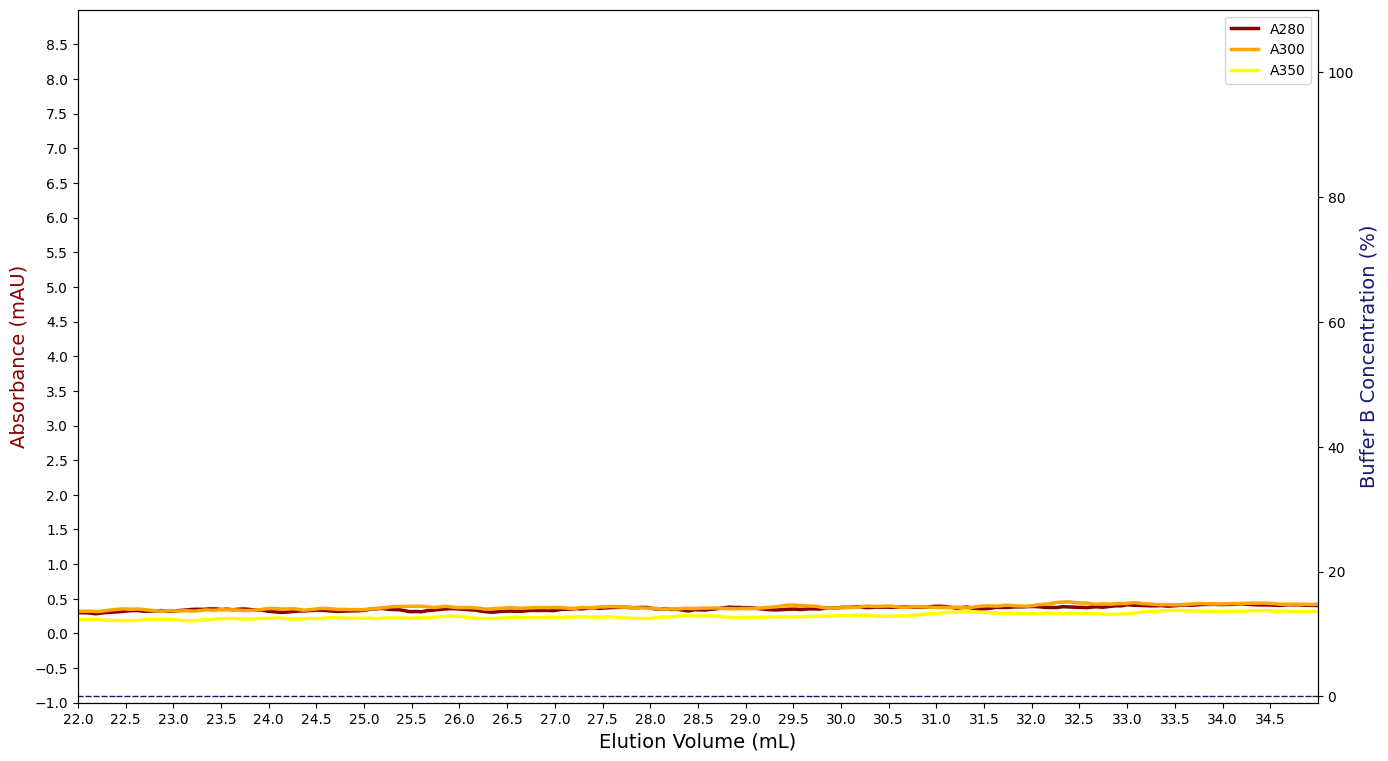

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading plot...
Done!


str

In [ ]:
#@markdown - Set minimum and maximum X and Y values for the graph. This may require some trial and error

min_x_val = 22 # @param {type:"number"}
max_x_val = 35 # @param {type:"number"}
min_y_val = -1 # @param {type:"number"}
max_y_val = 9 # @param {type:"number"}

#@markdown - Select the increments for your axes

inc_x = 0.5 # @param {type:"number"}
inc_y = 0.5 # @param {type:"number"}

#@markdown - do you wish to save your file?

save_file = True # @param {type:"boolean"}

#@markdown - saved files will be automatically downloaded to your downloads folder

print("user parameters uptaken...")


# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(16,9))
print("plotting A280 data...")

# set x-axis label
ax.set_xlabel("Elution Volume (mL)", fontsize = 14, fontname = 'DejaVu Sans')
# set y-axis label
ax.set_ylabel("Absorbance (mAU)",
              color="darkred",
              fontsize=14, fontname = 'DejaVu Sans')


ax.set_xlim([min_x_val, max_x_val])
ax.set_ylim([min_y_val, max_y_val])

plt.yticks(np.arange(min_y_val, max_y_val, inc_y))






# make a plot
ax.plot(sumdf2.astype(float)['vol'],
        sumdf2.astype(float)['A280'],
        color="darkred", linewidth = 2.5, label = 'A280')

ax.plot(sumdf2.astype(float)['volA300'],
        sumdf2.astype(float)['A300'],
        color="orange", linewidth = 2.5, label = 'A300')

ax.plot(sumdf2.astype(float)['volA350'],
        sumdf2.astype(float)['A350'],
        color="yellow", linewidth = 2.5, label = 'A350')
plt.legend()

print("absorbance data plotted. Plotting %B...")

pd.to_numeric(sumdf3['percentbvolstrim'])
pd.to_numeric(sumdf3['percentbtrim'])


# make a plot with different y-axis using second axis object
if data_type == 'AEC':
  ax2=ax.twinx()
  plt.axis([min_x_val, max_x_val, -1, 110])
  plt.xticks(np.arange(min_x_val, max_x_val, inc_x))
  ax2.plot(sumdf3.astype(float)['percentbvolstrim'][0:idx], sumdf3.astype(float)['percentbtrim'][0:idx],
           color="midnightblue", linewidth = 2.5, linestyle='none', markersize = 4.0, marker = "_")
  ax2.set_ylabel("Buffer B Concentration (%)",color="midnightblue",fontsize=14, fontname = 'DejaVu Sans')
else: print("No %B values shown, data_type == SEC")



print("printing plot...")




plt.show()

# save the plot as a file


if save_file == True:
  fig.savefig(f'{jobname}_all_wavelengths.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{jobname}_all_wavelengths.jpg')
  print("downloading plot...")
else:
  print("File not saved")


print("Done!")
type(sumdf3['percentbvolstrim'][67])

In [ ]:
#@markdown - now we locate the values for each wavelength to calculate the ratios
Wavelengths = "280, 300, 350" # @param ["280", "300", "350"] {allow-input: true}

#@markdown - select the elution volume you are looking for absorbance peak

peak_volume = 25.9 # @param {type:"number"}


if "280" in Wavelengths:
  differencesa280 = np.abs(sumdf2.astype(float)['vol'] - peak_volume)
  closest_indexa280 = differencesa280.argmin()
  closest_valuea280 = sumdf2.astype(float)['vol'][closest_indexa280]
  peak_A280 = sumdf2.astype(float)['A280'][closest_indexa280]
  print(f"A280 absorbance at {closest_valuea280} mL = {peak_A280} mAU")
else:
        print("mashallah")

if "300" in Wavelengths:
  volA300 = sumdf2.astype(float)['volA300'].dropna()
  differencesa300 = np.abs(volA300 - peak_volume)
  closest_indexa300 = differencesa300.argmin()
  closest_valuea300 = volA300[closest_indexa300]
  peak_A300 = sumdf2.astype(float)['A300'][closest_indexa300]
  print(f"A300 absorbance at {closest_valuea300} mL = {peak_A300} mAU")
else:
  print("mashallah")

if "350" in Wavelengths:
  volA350 = sumdf2.astype(float)['volA350'].dropna()
  differencesa350 = np.abs(volA350 - peak_volume)
  closest_indexa350 = differencesa350.argmin()
  closest_valuea350 = volA350[closest_indexa350]
  peak_A350 = sumdf2.astype(float)['A350'][closest_indexa350]
  print(f"A350 absorbance at {closest_valuea350} mL = {peak_A350} mAU")
else:
  print("mashallah")




A280 absorbance at 25.850449 mL = 0.353259 mAU
A300 absorbance at 25.772583 mL = 0.378524 mAU
A350 absorbance at 25.772583 mL = 0.240338 mAU


In [ ]:
#Creating data set of comparable a280, a300 and a350 values


compa280vol_list = []
compa280_list = []
compa300vol_list = []
compa300_list = []
compa350vol_list = []
compa350_list = []


a300df = pd.DataFrame(data={'volA300': vols300df,
                          'A300': A300df})
a300df = a300df.dropna()

a350df = pd.DataFrame(data={'vol350': vols350df,
                            'A350': A350df})
a350df = a350df.dropna()


a300df = a300df.astype(float)
for i in a300df['volA300']:
  differencesa300 = np.abs(sumdf2.astype(float)['vol'] - i)
  differencesa300 = differencesa300.dropna()
  closest_indexa300 = differencesa300.argmin()
  closest_valuea300 = sumdf2['vol'].iloc[closest_indexa300]
  compa280vol_list.append(closest_valuea300)
  compa280_list.append(sumdf2['A280'].iloc[closest_indexa300])
  compa300vol_list.append(i)

compa280vol_list = []
compa280_list = []

a350df = a350df.astype(float)
for i in a350df['vol350']:
  differencesa350 = np.abs(sumdf2.astype(float)['vol'] - i)
  differencesa350 = differencesa350.dropna()
  closest_indexa350 = differencesa350.argmin()
  closest_valuea350 = sumdf2['vol'].iloc[closest_indexa350]
  compa280vol_list.append(closest_valuea350)
  compa280_list.append(sumdf2['A280'].iloc[closest_indexa350])
  compa350vol_list.append(i)


compdf = pd.DataFrame()
compa300_list.append(a300df['A300'])
compa350_list.append(a350df['A350'])

compdf['a280vol']= np.array(compa280vol_list)
compdf['a280']= np.array(compa280_list)
compdf['a300vol'] = np.array(compa300vol_list)
compdf['a300'] = np.array(a300df['A300'])
compdf['a350vol'] = np.array(compa350vol_list)
compdf['a350'] = np.array(a350df['A350'])

compdf['280_300_ratio']= compdf['a280'].astype(float) / compdf['a300'].astype(float)
compdf['280_350_ratio']= compdf['a280'].astype(float) / compdf['a350'].astype(float)
compdf['300_350_ratio']= compdf['a300'].astype(float) / compdf['a350'].astype(float)

print(compdf)

KeyboardInterrupt: 

# plotting graph of the ratios between absorbances at the three wavelengths

In [ ]:
#@markdown - Set minimum and maximum X and Y values for the graph. This may require some trial and error

min_x_val = 22 # @param {type:"number"}
max_x_val = 35 # @param {type:"number"}
min_y_val = 0 # @param {type:"number"}
max_y_val = 4 # @param {type:"number"}

#@markdown - Select the increments for your axes

inc_x = 0.5 # @param {type:"number"}
inc_y = 0.5 # @param {type:"number"}

#@markdown - do you wish to save your file?

save_file = True # @param {type:"boolean"}

#@markdown - saved files will be automatically downloaded to your downloads folder

print("user parameters uptaken...")


# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(16,9))
print("plotting A280 data...")

# set x-axis label
ax.set_xlabel("Elution Volume (mL)", fontsize = 14, fontname = 'DejaVu Sans')
# set y-axis label
ax.set_ylabel("Ratio",
              color="black",
              fontsize=14, fontname = 'DejaVu Sans')


ax.set_xlim([min_x_val, max_x_val])
ax.set_ylim([min_y_val, max_y_val])

plt.yticks(np.arange(min_y_val, max_y_val, inc_y))






# make a plot
ax.plot(compdf.astype(float)['a280vol'],
        compdf.astype(float)['280_300_ratio'],
        color="darkred", linewidth = 2.5, label = '280:300 ratio')

ax.plot(compdf.astype(float)['a280vol'],
        compdf.astype(float)['280_350_ratio'],
        color="orange", linewidth = 2.5, label = '280:350 ratio')

ax.plot(compdf.astype(float)['a280vol'],
        compdf.astype(float)['300_350_ratio'],
        color="yellow", linewidth = 2.5, label = '300:350 ratio')

plt.legend()

ax2=ax.twinx()
plt.axis([min_x_val, max_x_val, -1, 8])
plt.xticks(np.arange(min_x_val, max_x_val, inc_x))
ax2.plot(sumdf2.astype(float)['vol'], sumdf2.astype(float)['A280'],
           color="midnightblue", linewidth = 2.5, linestyle='solid', markersize = 2.0, marker = "_")
ax2.set_ylabel("280nm Absorbance (mAU)",color="midnightblue",fontsize=14, fontname = 'DejaVu Sans')

plt.show

# save the plot as a file


if save_file == True:
  fig.savefig(f'{jobname}_wavelength ratios.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{jobname}_wavelength ratios.jpg')
  print("downloading plot...")
else:
  print("File not saved")